In [7]:
#Chess Board Coloring to minimize the number of colors used in each row
#min J = sum over i,j,k (i*j*k*X(i,j,k))
#such that:
#          for all i,j: sum over k (X(i,j,k)) = 1 (Choose only one color for each cell)
#          for all j,k: sum over i (X(i,j,k)) = 1 (sum of color every column should be 1)
#          for all i,k: sum over j (X(i,j,k)) = 1 (sum of colors every row should be 1)

In [8]:
from pyomo.environ import *
import matplotlib.pyplot as plt
cmap = plt.cm.Set1 #define colormap
cmap = [cmap(i) for i in range(20)]

In [11]:
model = AbstractModel()
model.N = Param(mutable=True)
model.i = RangeSet(model.N)
model.j = Set(initialize=model.i)
model.k = Set(initialize=model.i)

model.x = Var(model.i, model.j, model.k, within=Binary)
model.OF = Var(within=NonNegativeReals)

def r_C1(model, i, k):
    return sum(model.x[i,j,k] for j in model.j) == 1
model.C1 = Constraint(model.i, model.k, rule=r_C1)

def r_C2(model, j, k):
    return sum(model.x[i,j,k] for i in model.i) == 1
model.C2 = Constraint(model.i, model.k, rule=r_C2)

def r_C3(model, i, j):
    return sum(model.x[i,j,k] for k in model.k) == 1
model.C3 = Constraint(model.i, model.k, rule=r_C3)

def r_OF(model):
    return model.OF == sum(i*j*k*model.x[i,j,k] for i in model.i for j in model.j for k in model.k)
model.C4 = Constraint(rule=r_OF)

model.obj = Objective(expr=model.OF, sense=minimize)

In [12]:
model.N = 8
opt = SolverFactory('glpk')
#opt.options["mipgap"] = 0.05
instance = model.create_instance()
results = opt.solve(instance)
from pyomo.opt import SolverStatus, TerminationCondition

if (results.solver.status == SolverStatus.ok) and (results.solver.termination_condition == TerminationCondition.optimal):
    print("feasible")
elif results.solver.termination_condition == TerminationCondition.infeasible:
    print("infeasible")
else:
    #something else is wrong
    print('Solver Status: ', results.solver.status)

    mutable Param).  The linkage between this RangeSet and the original source
    data will be broken, so updating the data value in the future will not be
    reflected in this RangeSet.  To suppress this warning, explicitly convert
    the source data to a constant type (e.g., float, int, or immutable Param)
feasible


(0.6499999999999999, 8.35, 0.6499999999999999, 8.35)

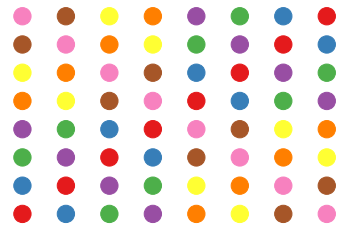

In [13]:
X = []
Y = []
K = []
for i in instance.i:
    for j in instance.j:
        for k in instance.k:
            if value(instance.x[i,j,k]) > 0:
                #print(i,j,k)
                X.append(i)
                Y.append(j)
                K.append(k)
Kn = [cmap[i-1] for i in K]
plt.scatter(X, Y, s=300, c=Kn)
plt.axis('off')

(0.6499999999999999, 8.35, 0.6499999999999999, 8.35)

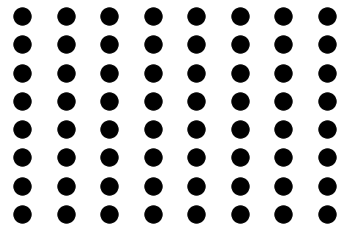

In [14]:
plt.scatter(X, Y, s=300, c='k')
plt.axis('off')